In [177]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 12]

In [178]:
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='float64', skiprows=2)

In [179]:
def create_grid(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))
    north_size = int(np.ceil((north_max - north_min)))

    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))
    east_size = int(np.ceil((east_max - east_min)))

    grid = np.zeros((north_size, east_size))

    for obstacle_idx in range(data.shape[0]):
            north, east, alt, d_north, d_east, d_alt = data[obstacle_idx, :]

            if alt + d_alt + safety_distance > drone_altitude:
                north_start = int(north - d_north - safety_distance - north_min)
                north_end = int(north + d_north + safety_distance - north_min)

                east_start = int(east - d_east - safety_distance - east_min)
                east_end = int(east + d_east + safety_distance - east_min)

                grid[north_start:north_end, east_start:east_end] = 1

    return grid

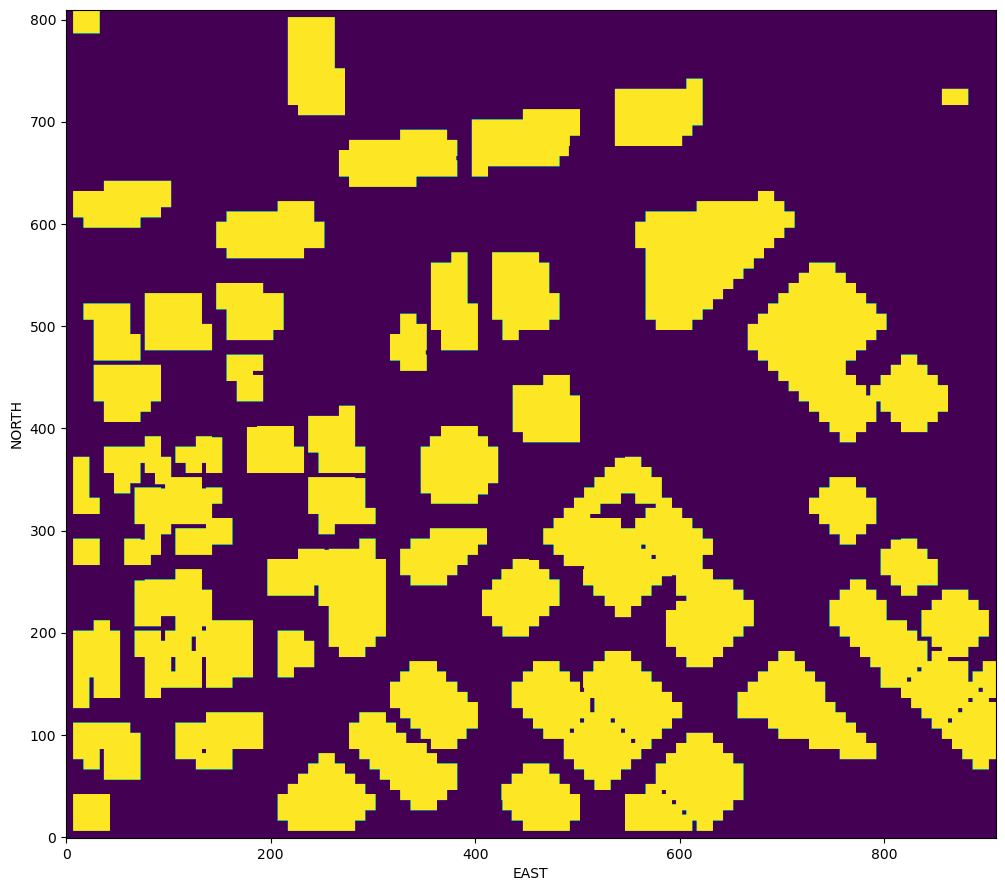

In [180]:
drone_altitude = 40 # Static drone altitude (metres)
safe_distance = 3

grid = create_grid(data, drone_altitude, safe_distance)

# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower') 

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()
